# Modeling

In [1]:
import sys

sys.path.append('/Users/nickolaspedrimiranda/CodeUp/Regression-Project/')

In [2]:
# Import basic DS libraries
import pandas as pd
import numpy as np

# Import libraries for visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Import useful DS functions
import acquire as ac
import prepare as prep
import evaluate as ev
import explore as ex

# For modeling
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

seed = 100

In [3]:
wine = ac.get_wine()

In [4]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [5]:
wine = ex.reajust_range(wine)
# wine = wine.drop(columns='residual_sugar')

In [6]:
train, val, test = prep.train_val_test(wine, strat='quality', seed=seed)
train, val, test = prep.scale(wine, train=train, val=val, test=test, scaled_cols=(wine.select_dtypes(float).columns))
train, val, test = prep.dummies(train, val, test, drop_first=['wine_type'])
x_train, y_train = prep.split_xy(train, 'quality')
x_val, y_val = prep.split_xy(val, 'quality')

In [7]:
train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type_white
324,0.739726,0.573427,0.253165,0.514851,0.563636,0.152866,0.173913,0.928986,0.400000,0.610390,0.137931,6,0
5697,0.273973,0.181818,0.430380,0.247525,0.336364,0.369427,0.529644,0.379600,0.457143,0.207792,0.448276,5,1
2405,0.246575,0.321678,0.329114,0.623762,0.336364,0.713376,0.786561,0.670755,0.409524,0.246753,0.206897,5,1
3107,0.301370,0.181818,0.620253,0.688119,0.463636,0.624204,0.648221,0.774048,0.771429,0.285714,0.241379,6,1
5166,0.315068,0.251748,0.341772,0.178218,0.200000,0.242038,0.292490,0.244028,0.361905,0.220779,0.534483,6,1


## BASELINE

In [8]:
results = ev.baseline(train.quality)

In [9]:
results.head()

,quality,base_median,base_mean
324,6,6.0,5.83048
5697,5,6.0,5.83048
2405,5,6.0,5.83048
3107,6,6.0,5.83048
5166,6,6.0,5.83048


In [10]:
SSE, MSE, RMSE = ev.eval_model(results.quality, results.base_mean.round())
SSE, MSE, RMSE

(3193.0, 0.7591535901093676, 0.8712942041063785)

In [11]:
SSE, MSE, RMSE = ev.eval_model(results.quality, results.base_median)
SSE, MSE, RMSE

(3193.0, 0.7591535901093676, 0.8712942041063785)

## POLYNOMIAL FEATURES

In [12]:
poly = PolynomialFeatures()
x_train_s = poly.fit_transform(x_train)
x_val_s = poly.transform(x_val)

## Linear Regression

In [13]:
lm = LinearRegression()  # Create model object
ev.train_model_gen2(lm, x_train, y_train, x_val, y_val)  # Check train and validate

The train RMSE is 0.7795532573385248.
The validate RMSE is 0.7684107299774686.


In [14]:
lm = LinearRegression()  # Create model object
ev.train_model_gen2(lm, x_train_s, y_train, x_val_s, y_val)  # Check train and validate

The train RMSE is 0.7426930472507584.
The validate RMSE is 0.7479160837744295.


## XGBRegressor

In [15]:
xgbr = XGBRegressor(max_depth=8, n_estimators=8, random_state=100)  # Create best model

ev.train_model_gen2(xgbr, x_train, y_train, x_val, y_val) # Evaluate

The train RMSE is 0.6699869765449888.
The validate RMSE is 0.7988615651174962.


In [16]:
xgbr = XGBRegressor(max_depth=8, n_estimators=8, random_state=100)  # Create best model

ev.train_model_gen2(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate

The train RMSE is 0.6251961175897992.
The validate RMSE is 0.7995559255833236.


## Random Forest Regressor

In [17]:
# Create best model
rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)

ev.train_model_gen2(rf, x_train, y_train, x_val, y_val)  # Evaluate model

The train RMSE is 0.6810735281429181.
The validate RMSE is 0.7351942218490143.


In [18]:
# Create best model
rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)

ev.train_model_gen2(rf, x_train_s, y_train, x_val_s, y_val)  # Evaluate model

The train RMSE is 0.6715819749108831.
The validate RMSE is 0.732168718388364.


## LASSO LARS

In [19]:
ll = LassoLars(alpha=0)
ev.train_model(ll, x_train, y_train, x_val, y_val)

The train RMSE is 0.716771885110661.
The validate RMSE is 0.7163999296023469.


## KNN

In [20]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
ev.train_model(knn, x_train, y_train, x_val, y_val)

The train RMSE is 0.7062656880124635.
The validate RMSE is 0.784137975129349.


In [21]:
knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
ev.train_model(knn, x_train_s, y_train, x_val_s, y_val)

The train RMSE is 0.7094565372322593.
The validate RMSE is 0.7791682864734351.


## Random Forest Classifier

In [22]:
rf1 = RandomForestClassifier(max_depth=5, random_state=seed)
ev.train_model(rf1, x_train, y_train, x_val, y_val)

The train RMSE is 0.7635291087787347.
The validate RMSE is 0.7684107299774686.


In [23]:
rf1 = RandomForestClassifier(max_depth=5, random_state=seed)
ev.train_model(rf1, x_train_s, y_train, x_val_s, y_val)

The train RMSE is 0.7328641563154681.
The validate RMSE is 0.7508781392624222.


## Decision Tree

In [24]:
clf = DecisionTreeClassifier(max_depth=3, random_state=seed)
ev.train_model(clf, x_train, y_train, x_val, y_val)

The train RMSE is 0.7977917692512981.
The validate RMSE is 0.8016353983424719.


## Logistic Regression

RESULTS WITH SUGAR: 

lm = 76, 74
xgb = 79, 79
random forest regressor = 73, 73
KNN = 78.5
rf1 = 76
decision tree = 80
logreg= 79

WITHOUT SUGAR

lm = 78, 76
xgb = 80, 83
random forest regressor = 73, 73
KNN = 78.5
rf1 = 76
decision tree = 80
logreg= 79

Without sugar is slightly worse

In [25]:
def test_models(x_train, y_train, x_val, y_val, d=6):
    poly = PolynomialFeatures()
    x_train_s = poly.fit_transform(x_train)
    x_val_s = poly.transform(x_val)
    
    print('Linear Regression')
    lm = LinearRegression()  # Create model object
    ev.train_model(lm, x_train, y_train, x_val, y_val)  # Check train and validate
    ev.train_model(lm, x_train_s, y_train, x_val_s, y_val)  # Check train and validate
    print()
    print('XGBRegressor')
    xgbr = XGBRegressor(max_depth=d, random_state=100)  # Create best model
    ev.train_model(xgbr, x_train, y_train, x_val, y_val) # Evaluate
    ev.train_model(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate
    print()
    print('Random Forest Regressor')
    # Create best model
    rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)
    ev.train_model(rf, x_train, y_train, x_val, y_val)  # Evaluate model
    ev.train_model(rf, x_train_s, y_train, x_val_s, y_val)  # Evaluate model
    print()
    print('KNN')
    knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
    ev.train_model(knn, x_train, y_train, x_val, y_val)
    ev.train_model(knn, x_train_s, y_train, x_val_s, y_val)
    print()
    print('Random Forest Classifier')
    rf1 = RandomForestClassifier(max_depth=d, random_state=seed)
    ev.train_model(rf1, x_train, y_train, x_val, y_val)
    ev.train_model(rf1, x_train_s, y_train, x_val_s, y_val)
    print()
    print('Decision Tree Classifier')
    clf = DecisionTreeClassifier(max_depth=d, random_state=seed)
    ev.train_model(clf, x_train, y_train, x_val, y_val)
    ev.train_model(clf, x_train_s, y_train, x_val_s, y_val)
    print()
    print()
    

In [64]:
def test_models_gen2(x_train, y_train, x_val, y_val, d=6):
    poly = PolynomialFeatures()
    x_train_s = poly.fit_transform(x_train)
    x_val_s = poly.transform(x_val)
    
    print('Linear Regression')
    lm = LinearRegression()  # Create model object
    ev.train_model_gen2(lm, x_train, y_train, x_val, y_val)  # Check train and validate
    ev.train_model_gen2(lm, x_train_s, y_train, x_val_s, y_val)  # Check train and validate
    print()
    print('XGBRegressor')
    xgbr = XGBRegressor(max_depth=d, random_state=100)  # Create best model
    ev.train_model_gen2(xgbr, x_train, y_train, x_val, y_val) # Evaluate
    ev.train_model_gen2(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate
    print()
    print('Random Forest Regressor')
    # Create best model
    rf = RandomForestRegressor(max_depth=6, min_samples_split=8, random_state=100)
    ev.train_model_gen2(rf, x_train, y_train, x_val, y_val)  # Evaluate model
    ev.train_model_gen2(rf, x_train_s, y_train, x_val_s, y_val)  # Evaluate model
    print()
    print('KNN')
    knn = KNeighborsClassifier(n_neighbors=7, weights='uniform')
    ev.train_model_gen2(knn, x_train, y_train, x_val, y_val)
    ev.train_model_gen2(knn, x_train_s, y_train, x_val_s, y_val)
    print()
    print('Random Forest Classifier')
    rf1 = RandomForestClassifier(max_depth=d, random_state=seed)
    ev.train_model_gen2(rf1, x_train, y_train, x_val, y_val)
    ev.train_model_gen2(rf1, x_train_s, y_train, x_val_s, y_val)
    print()
    print('Decision Tree Classifier')
    clf = DecisionTreeClassifier(max_depth=d, random_state=seed)
    ev.train_model_gen2(clf, x_train, y_train, x_val, y_val)
    ev.train_model_gen2(clf, x_train_s, y_train, x_val_s, y_val)
    print()
    print()
    

In [26]:
test_models(x_train, y_train, x_val, y_val)

Linear Regression
The train RMSE is 0.716771885110661.
The validate RMSE is 0.7163999296023467.
The train RMSE is 0.6742875122115677.
The validate RMSE is 0.6800919089836661.

XGBRegressor
The train RMSE is 0.24108011606029658.
The validate RMSE is 0.6387545348940477.
The train RMSE is 0.13036389272230306.
The validate RMSE is 0.621414587343548.

Random Forest Regressor
The train RMSE is 0.6190106752910569.
The validate RMSE is 0.6783116786928595.
The train RMSE is 0.6034036269943391.
The validate RMSE is 0.6715200733143334.

KNN
The train RMSE is 0.7062656880124635.
The validate RMSE is 0.784137975129349.
The train RMSE is 0.7094565372322593.
The validate RMSE is 0.7791682864734351.

Random Forest Classifier
The train RMSE is 0.7263467822753336.
The validate RMSE is 0.7560338123498209.
The train RMSE is 0.7020451070852293.
The validate RMSE is 0.7382073255487889.

Decision Tree Classifier
The train RMSE is 0.7407697991869955.
The validate RMSE is 0.7741666960364172.
The train RMSE is 

In [27]:
wine = prep.pour()

In [28]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [29]:
wine = wine.drop(columns=['density'])

In [30]:
x_train, y_train, x_val, y_val, test = prep.drink_up(wine)

In [31]:
test_models(x_train, y_train, x_val, y_val)

Linear Regression
The train RMSE is 0.7197657355454814.
The validate RMSE is 0.7222928479566003.
The train RMSE is 0.6818510663041247.
The validate RMSE is 0.6934420218326813.

XGBRegressor
The train RMSE is 0.239043929286722.
The validate RMSE is 0.6474638669791551.
The train RMSE is 0.14088309676849828.
The validate RMSE is 0.6305433409302684.

Random Forest Regressor
The train RMSE is 0.619751745996752.
The validate RMSE is 0.6786878411360465.
The train RMSE is 0.6032898823238895.
The validate RMSE is 0.672369556218695.

KNN
The train RMSE is 0.7044117479172953.
The validate RMSE is 0.7946826616589785.
The train RMSE is 0.7091213345028308.
The validate RMSE is 0.7932848018930776.

Random Forest Classifier
The train RMSE is 0.7286344943408314.
The validate RMSE is 0.7560338123498209.
The train RMSE is 0.6993305677476211.
The validate RMSE is 0.7389586817998184.

Decision Tree Classifier
The train RMSE is 0.7426930472507584.
The validate RMSE is 0.7925849474984432.
The train RMSE is 0

In [32]:
poly = PolynomialFeatures()
x_train_s = poly.fit_transform(x_train)
x_val_s = poly.transform(x_val)

xgbr = XGBRegressor(max_depth=6, random_state=100)  # Create best model
ev.train_model(xgbr, x_train, y_train, x_val, y_val) # Evaluate
ev.train_model(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate

xgbr = XGBRegressor(max_depth=6, random_state=100)  # Create best model
ev.train_model_gen2(xgbr, x_train, y_train, x_val, y_val) # Evaluate
ev.train_model_gen2(xgbr, x_train_s, y_train, x_val_s, y_val) # Evaluate

The train RMSE is 0.239043929286722.
The validate RMSE is 0.6474638669791551.
The train RMSE is 0.14088309676849828.
The validate RMSE is 0.6305433409302684.
The train RMSE is 0.23787776223724555.
The validate RMSE is 0.7090660722271048.
The train RMSE is 0.08585116892008703.
The validate RMSE is 0.6851849074379033.


In [33]:
xgbr = XGBRegressor(max_depth=6, random_state=100)  # Create best model
xgbr.fit(x_train, y_train)
train_prediction = xgbr.predict(x_train)
val_prediction = xgbr.predict(x_val)

In [34]:
y_val

135     5
3410    5
1203    5
870     6
3707    6
       ..
995     6
2417    5
1699    5
4826    6
5045    6
Name: quality, Length: 901, dtype: int64

In [35]:
val_results = pd.DataFrame(y_val)

In [36]:
val_results['val_prediction'] = val_prediction

In [37]:
val_results

,quality,val_prediction
135,5,4.942943
3410,5,5.060705
1203,5,5.440688
870,6,5.977282
3707,6,6.027166
...,...,...
995,6,5.523466
2417,5,4.936756
1699,5,6.034935
4826,6,5.263748


In [38]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,wine_type_white
324,0.739726,0.573427,0.253165,0.514851,0.563636,0.152866,0.173913,0.400000,0.610390,0.137931,0
5697,0.273973,0.181818,0.430380,0.247525,0.336364,0.369427,0.529644,0.457143,0.207792,0.448276,1
2405,0.246575,0.321678,0.329114,0.623762,0.336364,0.713376,0.786561,0.409524,0.246753,0.206897,1
3107,0.301370,0.181818,0.620253,0.688119,0.463636,0.624204,0.648221,0.771429,0.285714,0.241379,1
5166,0.315068,0.251748,0.341772,0.178218,0.200000,0.242038,0.292490,0.361905,0.220779,0.534483,1
...,...,...,...,...,...,...,...,...,...,...,...
458,0.794521,0.349650,0.797468,0.108911,0.681818,0.050955,0.063241,0.495238,0.675325,0.482759,0
100,0.506849,0.741259,0.379747,0.074257,0.681818,0.127389,0.173913,0.628571,0.506494,0.310345,0
4338,0.301370,0.335664,0.354430,0.207921,0.227273,0.305732,0.371542,0.323810,0.324675,0.689655,1
6439,0.301370,0.363636,0.455696,0.410891,0.181818,0.547771,0.482213,0.514286,0.168831,0.612069,1


In [39]:
x_val

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,wine_type_white
135,0.520548,0.930070,0.139241,0.064356,0.736364,0.191083,0.225296,0.428571,0.779221,0.206897,0
3410,0.410959,0.419580,0.253165,0.138614,0.336364,0.101911,0.434783,0.390476,0.246753,0.172414,1
1203,0.726027,0.923077,0.240506,0.257426,0.927273,0.407643,0.276680,0.380952,0.428571,0.172414,0
870,0.424658,0.888112,0.012658,0.074257,0.500000,0.382166,0.146245,0.638095,0.454545,0.586207,0
3707,0.383562,0.139860,0.455696,0.618812,0.427273,0.904459,0.620553,0.647619,0.168831,0.120690,1
...,...,...,...,...,...,...,...,...,...,...,...
995,0.424658,0.727273,0.075949,0.069307,0.636364,0.229299,0.138340,0.619048,0.519481,0.293103,0
2417,0.219178,0.307692,0.215190,0.108911,0.281818,0.292994,0.470356,0.257143,0.311688,0.103448,1
1699,0.383562,0.237762,0.468354,0.638614,0.463636,0.649682,0.735178,0.247619,0.285714,0.120690,1
4826,0.301370,0.265734,0.468354,0.376238,0.418182,0.649682,0.735178,0.352381,0.389610,0.189655,1


In [40]:
wine = prep.pour()
#wine = wine.drop(columns=['density'])
x_train, y_train, x_val, y_val, test = prep.drink_up(wine)

In [177]:
wine = prep.pour()
def cluster_pipeline(wine, cluster_cols=['total_sulfur_dioxide', 'chlorides', 'density'],
                     clusters = 3):
    
    x_train, y_train, x_val, y_val, test = prep.drink_up(wine)
    x_test, y_test = prep.split_xy(test, 'quality')

    X = train[cluster_cols]
    Y = val[cluster_cols]
    Z = test[cluster_cols]

    kmeans = KMeans(n_clusters=clusters, n_init='auto')
    kmeans.fit(X)

    train_pred = kmeans.predict(X).astype(str)
    val_pred = kmeans.predict(Y)
    test_pred = kmeans.predict(Z)

    #x_train = x_train.drop(columns=cluster_cols)
    #x_val = x_val.drop(columns=cluster_cols)
    #x_test = x_test.drop(columns=cluster_cols)
    
    x_train['cluster'] = train_pred
    x_val['cluster'] = val_pred
    x_test['cluster'] = test_pred
    '''
    if clusters < 3:
        x_train = pd.get_dummies(x_train, columns=['cluster'], drop_first=True)
        x_val = pd.get_dummies(x_val, columns=['cluster'], drop_first=True)
        x_test = pd.get_dummies(x_test, columns=['cluster'], drop_first=True)
    else:
        x_train = pd.get_dummies(x_train, columns=['cluster'], drop_first=False)
        x_val = pd.get_dummies(x_val, columns=['cluster'], drop_first=False)
        x_test = pd.get_dummies(x_test, columns=['cluster'], drop_first=False)
    '''
    return  x_train, y_train, x_val, y_val,  x_test, y_test

In [112]:
wine = prep.pour()
wine = wine.drop(columns=['total_sulfur_dioxide','chlorides', 'density'])
x_train, y_train, x_val, y_val,  x_test, y_test = cluster_pipeline(wine,
    cluster_cols= ['sulphates', 'free_sulfur_dioxide'],
    clusters = 2)


poly = PolynomialFeatures()
x_train_s = poly.fit_transform(x_train)
x_val_s = poly.transform(x_val)


rf = RandomForestRegressor(max_depth=7, min_samples_split=10, random_state=100)
ev.train_model(rf, x_train, y_train, x_val, y_val)  # Evaluate model
#ev.train_model(rf, x_train_s, y_train, x_val_s, y_val)  # Evaluate model

The train RMSE is 0.620465878742751.
The validate RMSE is 0.6778894000926463.


In [116]:
predictions = rf.predict(x_test)

In [113]:
ev.train_model(rf, x_train, y_train, x_test, y_test)  # Evaluate model

The train RMSE is 0.620465878742751.
The validate RMSE is 0.7151870285086933.


In [133]:
x_test['Predictions'] = predictions
x_test['Actual Quality'] = y_test

In [134]:
x_test

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,pH,alcohol,wine_type_white,cluster_1,predictions,actual,Actual Quality,Predictions
1228,0.068493,0.475524,0.000000,0.059406,0.895238,0.896552,0,0,6.448633,7,7,6.448633
2313,0.191781,0.433566,0.329114,0.103960,0.638095,0.413793,1,1,5.903541,6,6,5.903541
4293,0.219178,0.279720,0.341772,0.480198,0.438095,0.396552,1,0,5.900319,6,6,5.900319
6259,0.273973,0.349650,0.518987,0.069307,0.504762,0.689655,1,0,6.499594,6,6,6.499594
3995,0.520548,0.307692,0.316456,0.849010,0.228571,0.120690,1,0,5.232852,5,5,5.232852
...,...,...,...,...,...,...,...,...,...,...,...,...
290,0.561644,0.615385,0.113924,0.094059,0.571429,0.379310,0,0,5.892796,7,7,5.892796
5642,0.383562,0.111888,0.341772,0.737624,0.152381,0.051724,1,0,7.063685,7,7,7.063685
2145,0.232877,0.251748,0.303797,0.326733,0.714286,0.224138,1,1,5.495778,6,6,5.495778
2936,0.287671,0.139860,0.379747,0.287129,0.523810,0.275862,1,1,5.947339,5,5,5.947339


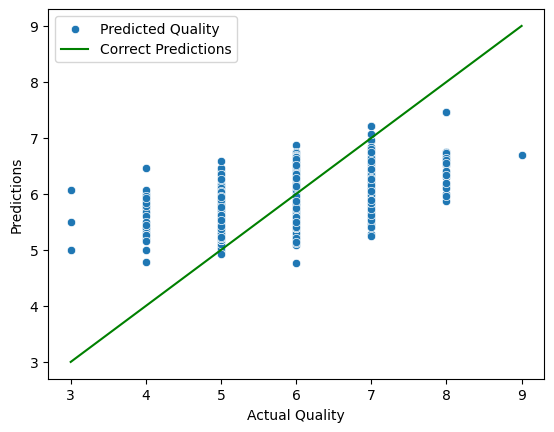

In [142]:
sns.scatterplot(x_test, x='Actual Quality', y='Predictions', label='Predicted Quality')
plt.plot([3,4,5,6,7,8,9],[3,4,5,6,7,8,9], color='green', label='Correct Predictions')
plt.legend()

In [57]:
wine = prep.pour()
x_train, y_train, x_val, y_val, test = cluster_pipeline(wine,
    clusters = 4)

In [172]:
wine = prep.pour()
x_train, y_train, x_val, y_val, x_test, y_test = cluster_pipeline(wine,
    cluster_cols= [ 'total_sulfur_dioxide', 'residual_sugar'],
    clusters = 3)

In [178]:
wine = prep.pour()
wine = wine.drop(columns=['total_sulfur_dioxide','chlorides', 'density'])
x_train, y_train, x_val, y_val,  x_test, y_test = cluster_pipeline(wine,
    cluster_cols= ['sulphates', 'free_sulfur_dioxide'],
    clusters = 2)

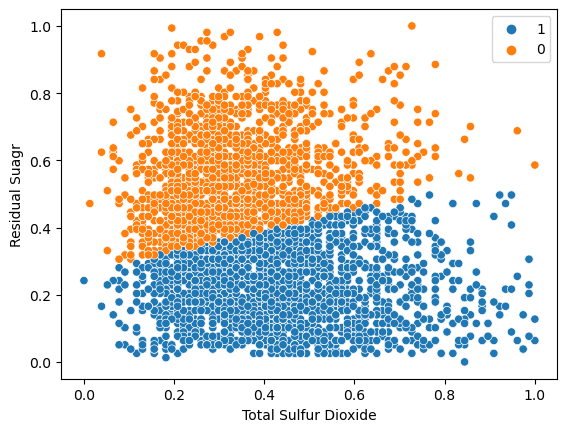

In [180]:
sns.scatterplot(x_train, x='sulphates', y='free_sulfur_dioxide', hue='cluster')
plt.xlabel('Total Sulfur Dioxide')
plt.ylabel('Residual Suagr')
plt.legend()

In [61]:
test_models(x_train, y_train, x_val, y_val,6)

Linear Regression
The train RMSE is 0.7401895773235896.
The validate RMSE is 0.7370297238854314.
The train RMSE is 0.6960764046050821.
The validate RMSE is 0.7015761262130932.

XGBRegressor
The train RMSE is 0.2545756507566332.
The validate RMSE is 0.6534823168669797.
The train RMSE is 0.1523955126493089.
The validate RMSE is 0.6489470677083113.

Random Forest Regressor
The train RMSE is 0.6470485811672245.
The validate RMSE is 0.6911400756225089.
The train RMSE is 0.6292892452850896.
The validate RMSE is 0.6848772494754262.

KNN
The train RMSE is 0.7253641255246864.
The validate RMSE is 0.7727317240964572.
The train RMSE is 0.7289607242628587.
The validate RMSE is 0.7669649888473704.

Random Forest Classifier
The train RMSE is 0.7305896888065111.
The validate RMSE is 0.7538285558904728.
The train RMSE is 0.7122993915517163.
The validate RMSE is 0.7538285558904728.

Decision Tree Classifier
The train RMSE is 0.7748114982511287.
The validate RMSE is 0.8064666498186396.
The train RMSE is

In [68]:
wine = prep.pour()
wine = wine.drop(columns=['free_sulfur_dioxide','chlorides', 'density'])
x_train, y_train, x_val, y_val, test = prep.drink_up(wine)

In [70]:
x_train

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,total_sulfur_dioxide,pH,sulphates,alcohol,wine_type_white
324,0.739726,0.573427,0.253165,0.514851,0.173913,0.400000,0.610390,0.137931,0
5697,0.273973,0.181818,0.430380,0.247525,0.529644,0.457143,0.207792,0.448276,1
2405,0.246575,0.321678,0.329114,0.623762,0.786561,0.409524,0.246753,0.206897,1
3107,0.301370,0.181818,0.620253,0.688119,0.648221,0.771429,0.285714,0.241379,1
5166,0.315068,0.251748,0.341772,0.178218,0.292490,0.361905,0.220779,0.534483,1
...,...,...,...,...,...,...,...,...,...
458,0.794521,0.349650,0.797468,0.108911,0.063241,0.495238,0.675325,0.482759,0
100,0.506849,0.741259,0.379747,0.074257,0.173913,0.628571,0.506494,0.310345,0
4338,0.301370,0.335664,0.354430,0.207921,0.371542,0.323810,0.324675,0.689655,1
6439,0.301370,0.363636,0.455696,0.410891,0.482213,0.514286,0.168831,0.612069,1
